## Descriptive Statistics

 Import **NumPy**, **SciPy**, and **Pandas**

In [53]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

 Randomly generate 1,000 samples from the normal distribution using `np.random.normal()`(mean = 100, standard deviation = 15)

In [54]:
samples = np.random.normal(100,15,1000) # other way np.random.randn(1000)*15+100
samples

array([116.07878785,  79.61351622,  94.42737307, 135.74746398,
       113.81671948, 108.61328815, 112.01462846, 104.47679255,
       105.77674203,  92.91777591,  95.05330333,  91.57570387,
        91.43853786, 109.85480186, 104.39151126,  91.0576708 ,
        74.14033058, 102.04152826,  83.5842353 , 110.8035406 ,
        97.32280855, 124.72715322,  91.21242863,  97.37282474,
       120.3276379 ,  77.94980792,  78.37782813,  89.44588239,
        86.23112484, 105.78689162, 140.96828799,  77.19826231,
       102.52406291,  89.4267698 , 122.15490352, 109.60782043,
        87.4561961 , 108.92203712, 111.70261895, 109.83711681,
       116.39593339, 120.71309161,  96.07646147, 126.23680643,
        93.79709434,  82.08833476,  93.21397327,  81.7474268 ,
       101.17090161,  91.41474675,  82.67602818,  97.99020711,
       122.44278908, 126.88508414,  95.82880846,  95.8920952 ,
       105.88571679, 126.45759866,  91.29269567,  95.13973381,
        97.79414681,  66.28164783,  71.39966289,  91.58

Compute the **mean**, **median**, and **mode**

In [55]:
mean = np.mean(samples)
median =np.median(samples)
mode = stats.mode(samples)
print("mean:", mean,",\nmedian:", median, ",\nmode", mode)

mean: 99.42125030460835 ,
median: 98.65614808900882 ,
mode ModeResult(mode=array([53.67233249]), count=array([1]))


Compute the **min**, **max**, **Q1**, **Q3**, and **interquartile range**

In [56]:
min = samples.min()
max = samples.max()
q1 = np.percentile(samples, 25)
q3 = np.percentile(samples, 75)
iqr = q3 - q1
print("min:", min,", \nmax:", max,",","\nq1:", q1,", \nq3:",q3,", \niqr:",iqr)

min: 53.67233248777768 , 
max: 149.45112350232353 , 
q1: 89.35121663108889 , 
q3: 110.50384338938836 , 
iqr: 21.152626758299476


Compute the **variance** and **standard deviation**

In [57]:
variance = np.var(samples)
std_dev =  np.std(samples)

print("std: ", std_dev, "\n\nvariance: ", variance)

std:  15.46807640036529 

variance:  239.2613875275376


Compute the **skewness** and **kurtosis**

In [58]:
skewness = stats.skew(samples)
kurtosis = stats.kurtosis(samples)
print("skewness: ", skewness, ",\n\nkurtosis: ", kurtosis)

skewness:  0.06694732299304748 ,

kurtosis:  -0.02098318383457487


## NumPy Correlation Calculation

Create an array x of integers between 10 (inclusive) and 20 (exclusive). Use `np.arange()`

In [59]:
x = np.arange(10,20)
x

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

Then use `np.array()` to create a second array y containing 10 arbitrary integers.

In [60]:
y =  np.random.randint(1,100,10)
y

array([13, 56, 38,  4, 91, 96, 44, 71, 98, 53])

Once you have two arrays of the same length, you can compute the **correlation coefficient** between x and y

In [61]:
r = np.corrcoef(x, y)
r

array([[1.        , 0.52379882],
       [0.52379882, 1.        ]])

## Pandas Correlation Calculation

Run the code below

In [62]:
x = pd.Series(range(10, 20))
y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
df = pd.DataFrame(list(zip(x, y)), columns=['x', 'y'])
df

,x,y
0,10,2
1,11,1
2,12,4
3,13,5
4,14,8
5,15,12
6,16,18
7,17,25
8,18,96
9,19,48


Call the relevant method  to calculate Pearson's r correlation.

In [63]:
r = stats.pearsonr(x,y)
r

(0.758640289091187, 0.010964341301680813)

In [64]:
r1 = x.corr(y)
r1

0.7586402890911867

OPTIONAL. Call the relevant method to calculate Spearman's rho correlation.

In [65]:
rho, p = stats.spearmanr(x, y)
print('Spearmans correlation coefficient: %.6f' % rho)

Spearmans correlation coefficient: 0.975758


## Seaborn Dataset Tips

Import Seaborn Library

In [66]:
import seaborn as sns

Load "tips" dataset from Seaborn

In [67]:
tips = sns.load_dataset("tips")

Generate descriptive statistics include those that summarize the central tendency, dispersion

In [68]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


Call the relevant method to calculate pairwise Pearson's r correlation of columns

In [69]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


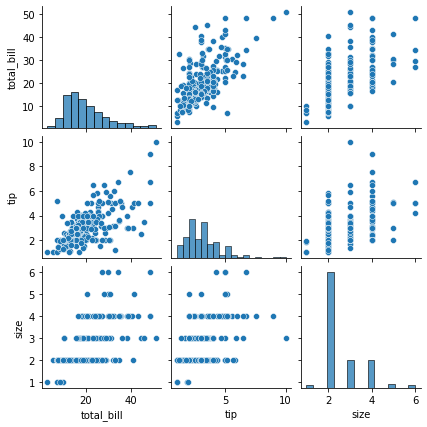

In [70]:
sns.pairplot(tips, height = 2)
plt.show();

(5.0, 0.0)

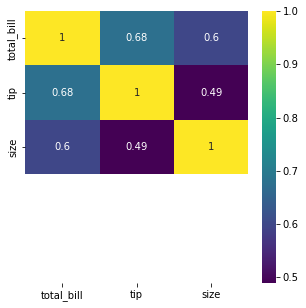

In [71]:
plt.figure(figsize=(5,5))
sns.heatmap(tips.corr(),annot=True, cmap='viridis')
plt.ylim(5, 0)  